In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("List of most-streamed songs on Spotify.csv")

In [3]:
df

,Rank,Song,Streams (Billions),Artist,Release Date
0,1,Shape of You,"3,327",Ed Sheeran,6 January 2017
1,2,Blinding Lights,"3,323",The Weeknd,29 November 2019
2,3,Dance Monkey,"2,721",Tones And I,10.May.19
3,4,Someone You Loved,"2,588",Lewis Capaldi,8 November 2018
4,5,Rockstar,"2,570",Post Malone featuring 21 Savage,15 September 2017
...,...,...,...,...,...
95,96,I'm Yours,"1,490",Jason Mraz,12 February 2008
96,97,Despacito,"1,490",Luis Fonsi featuring Daddy Yankee,12 January 2017
97,98,Smells Like Teen Spirit,"1,487",Nirvana,10 September 1991
98,99,Sugar,"1,480",Maroon 5,29 August 2014


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Rank                100 non-null    int64 
 1   Song                100 non-null    object
 2   Streams (Billions)  100 non-null    object
 3   Artist              100 non-null    object
 4   Release Date        100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [10]:
isimler = list(set(df.Song.str.lower().to_list()))
print("Şarkı isimleri {} öğeden oluşmaktadır.".format(len(isimler)))

Şarkı isimleri 99 öğeden oluşmaktadır.


In [11]:
df["Streams (Billions)"]=df["Streams (Billions)"].str.replace(",","")
df["Streams (Billions)"]=df["Streams (Billions)"].astype("int")
df["Release Date"]=df["Release Date"].astype("datetime64[ns]")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Rank                100 non-null    int64         
 1   Song                100 non-null    object        
 2   Streams (Billions)  100 non-null    int32         
 3   Artist              100 non-null    object        
 4   Release Date        100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 3.6+ KB


In [14]:
df.head()

,Rank,Song,Streams (Billions),Artist,Release Date
0,1,Shape of You,3327,Ed Sheeran,2017-01-06
1,2,Blinding Lights,3323,The Weeknd,2019-11-29
2,3,Dance Monkey,2721,Tones And I,2019-05-10
3,4,Someone You Loved,2588,Lewis Capaldi,2018-11-08
4,5,Rockstar,2570,Post Malone featuring 21 Savage,2017-09-15


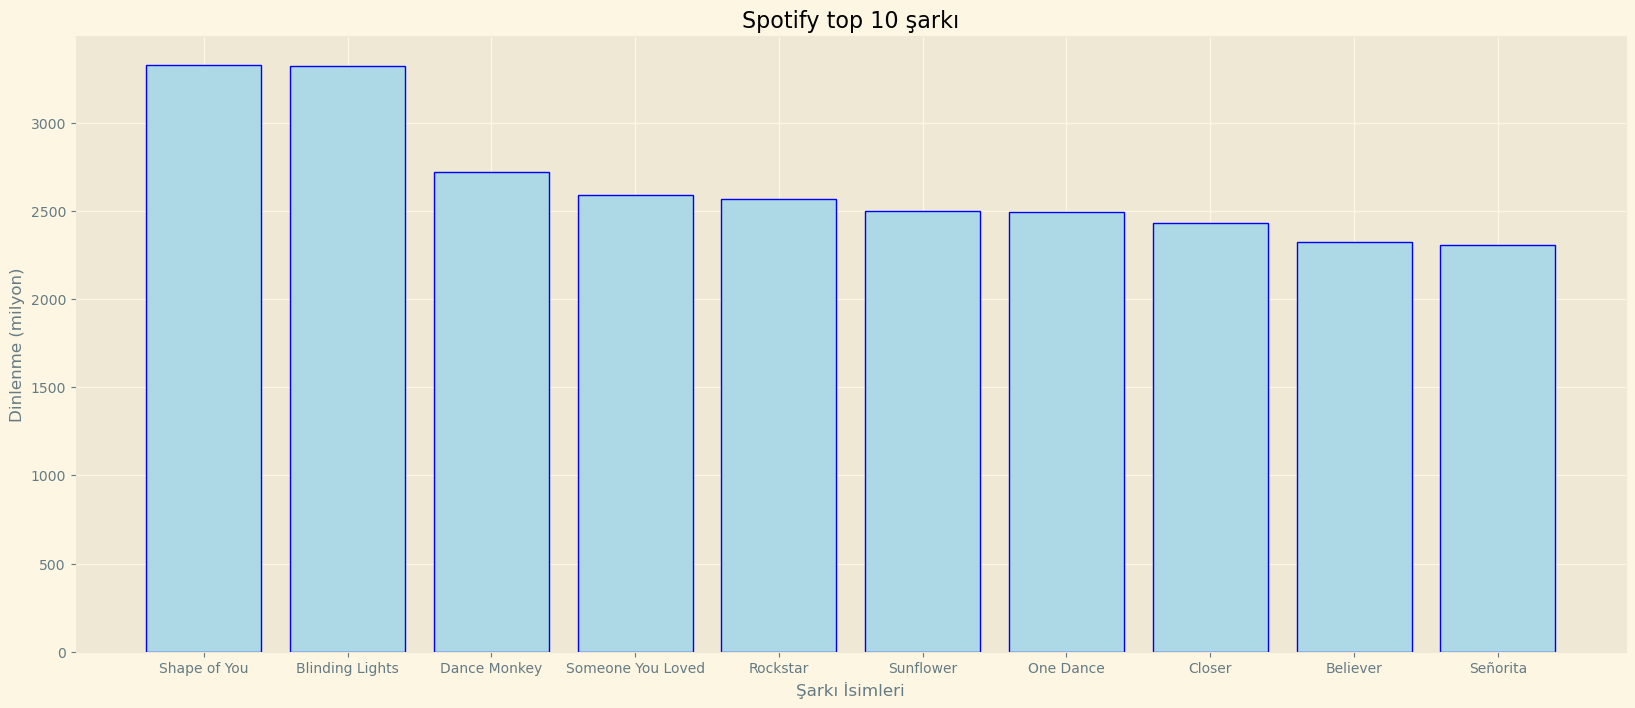

In [30]:
#ilk 10 şarkı 
dinlenme = df["Streams (Billions)"].head(10)
isim = df["Song"].head(10)

plt.style.use("Solarize_Light2")
fig = plt.figure(figsize = (20,8))
plt.bar(isim, dinlenme, color="lightblue", edgecolor="blue")
plt.xlabel("Şarkı İsimleri")
plt.ylabel("Dinlenme (milyon)")
plt.title("Spotify top 10 şarkı")
plt.show()

In [25]:
sanatcı = df[["Artist","Streams (Billions)"]].groupby("Artist").sum()
sanatcı = sanatcı.sort_values(by="Streams (Billions)", ascending=False)
sanatcı = sanatcı.head(10)

<AxesSubplot: title={'center': 'En çok dinlenen 5 sanatçı'}, xlabel='Artist'>

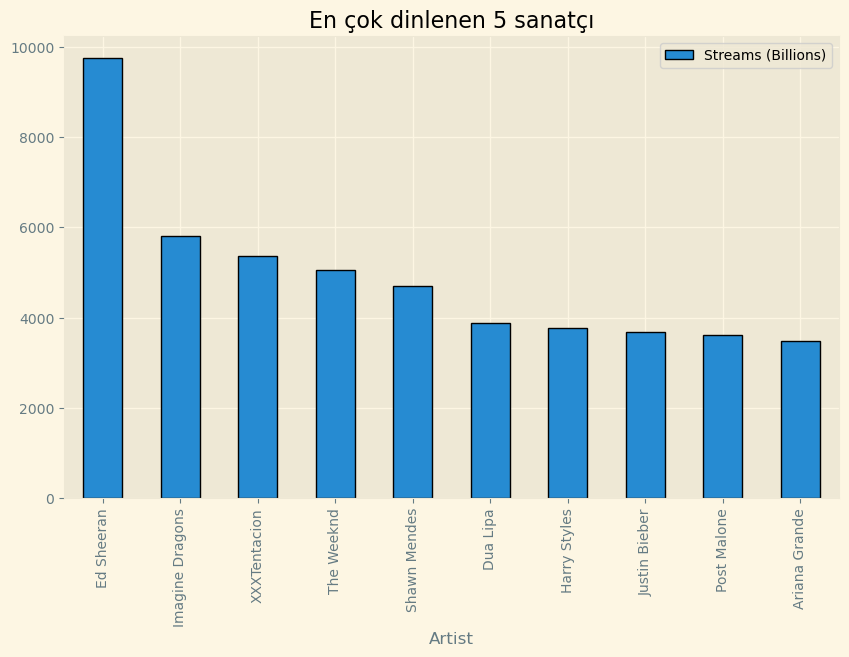

In [26]:
plt.style.use("Solarize_Light2")
sanatcı.plot(kind = "bar", 
             figsize = (10,6), 
             title = "En çok dinlenen 5 sanatçı",
             edgecolor = "black")

<AxesSubplot: title={'center': 'Dinlenme Sayılarının Dağılımı'}, ylabel='Frequency'>

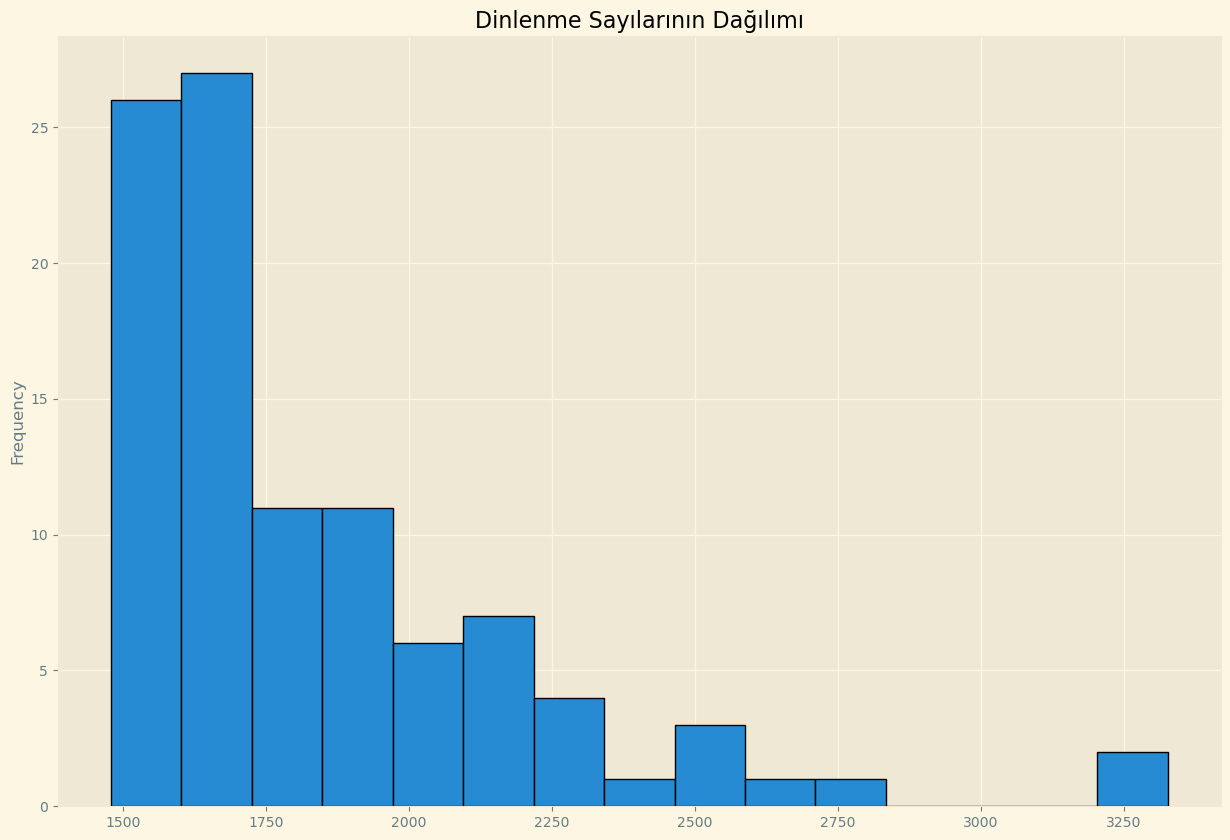

In [32]:
#dinlenmelerin dagılımı
dinlenme = df["Streams (Billions)"]
dinlenme.plot(kind = "hist",figsize=(15,10),
              bins = 15,
              edgecolor = "black",
              title = "Dinlenme Sayılarının Dağılımı")

In [33]:
#cikis yili
df["year"] = pd.DatetimeIndex(df["Release Date"]).year

<AxesSubplot: title={'center': 'Yıllara göre ortalama dinlenme sayısı'}, xlabel='year'>

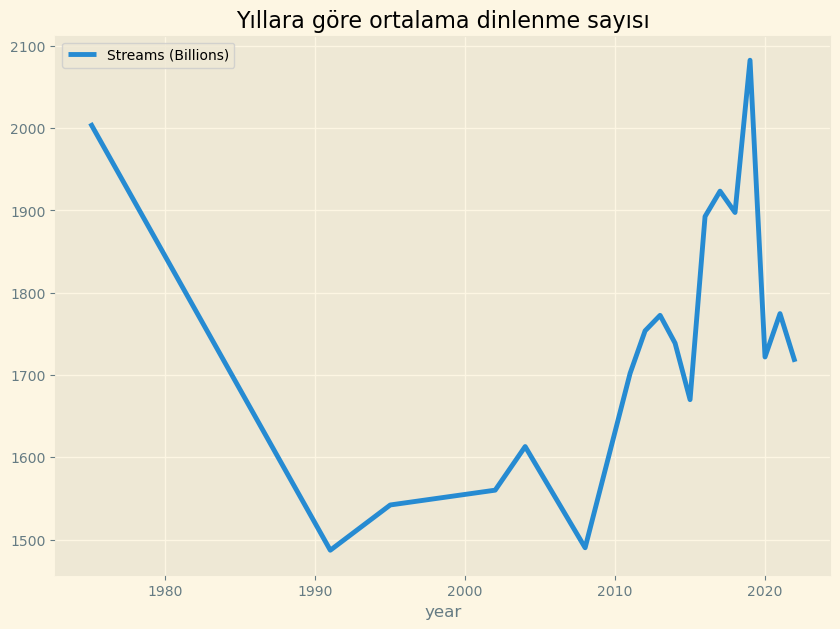

In [36]:
yil = pd.pivot_table(df, index=["year"],values="Streams (Billions)",aggfunc=("mean"))
yil.plot(kind="line",linewidth=3.5,figsize=(10,7),title="Yıllara göre ortalama dinlenme sayısı")

<AxesSubplot: >

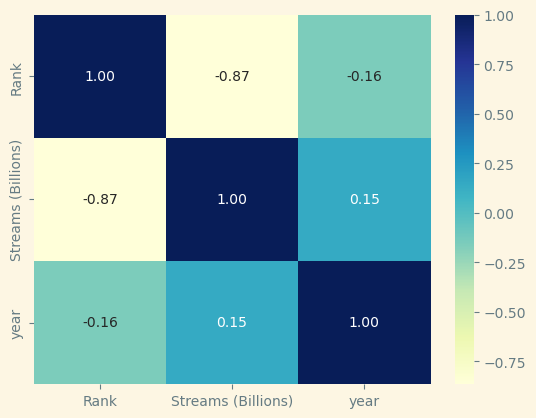

In [39]:
#korelasyon
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",fmt=".2f")

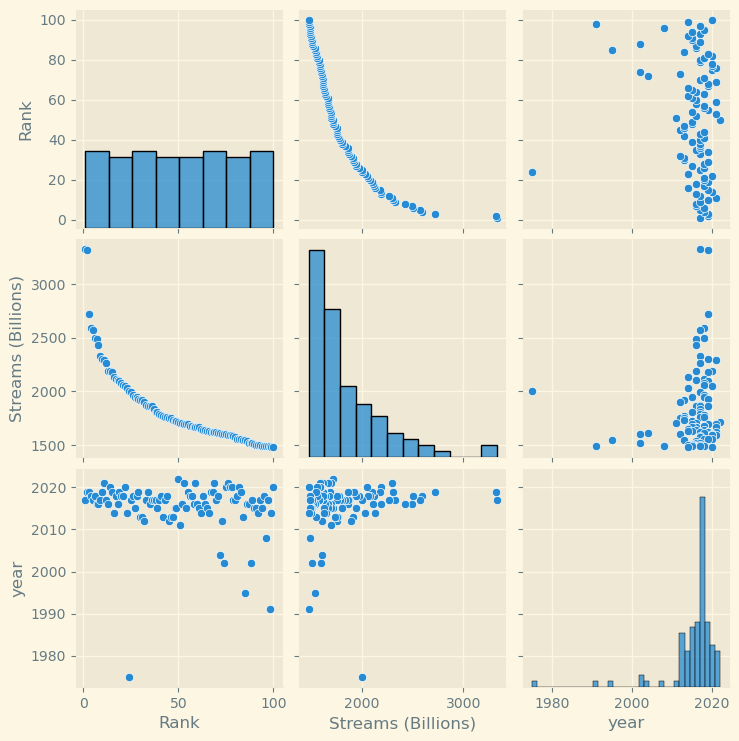

In [41]:
sns.pairplot(df)